# Load Libraries

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

# Load Data

In [3]:
input_file = './data/car_prices.csv'
output_file = './data/cleaned_car_prices.csv'
expected_fields = 16  # Adjust this based on your actual expected number of fields (there were like 26 rows with 17 fields for some reason)

# Create a cleaned CSV file
with open(input_file, 'r', newline='', encoding='utf-8') as infile, open(output_file, 'w', newline='', encoding='utf-8') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    
    for row in reader:
        if len(row) == expected_fields:
            writer.writerow(row)

# Load the cleaned file into a Pandas DataFrame
df = pd.read_csv(output_file)

df.info() # check the basic info of the data

print()
# 2. Check the first few rows of the data
print("First 5 rows:")
df.head() # check the first few rows of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB

First 5 rows:


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
missing_values = pd.DataFrame({
    'Num of Missing Values' : df.isnull().sum(), # check the missing values
    'Percentage of Missing Values' : (df.isnull().sum()/len(df) * 100).round(2) # check the percentage of missing values
})
display(missing_values)

,Num of Missing Values,Percentage of Missing Values
year,0,0.00
make,10301,1.84
model,10399,1.86
trim,10651,1.91
body,13195,2.36
transmission,65353,11.70
vin,0,0.00
state,0,0.00
condition,11794,2.11
odometer,94,0.02


In [10]:
# Print the name and count for the 'make' column
make_counts = df['make'].value_counts()
print("Make counts:")
print(make_counts)
print("\n")

# Print the name and count for the 'model' column
model_counts = df['model'].value_counts()
print("Model counts:")
print(model_counts)
print("\n")

# Print the name and count for the 'trim' column
trim_counts = df['trim'].value_counts()
print("Trim counts:")
print(trim_counts)
print("\n")

# Print the name and count for the 'body' column
body_counts = df['body'].value_counts()
print("Body counts:")
print(body_counts)

Make counts:
make
Ford          93554
Chevrolet     60197
Nissan        53946
Toyota        39871
Dodge         30710
              ...  
ford tk           1
chev truck        1
airstream         1
dot               1
Lotus             1
Name: count, Length: 96, dtype: int64


Model counts:
model
Altima        19349
F-150         14479
Fusion        12946
Camry         12545
Escape        11861
              ...  
Q3                1
F-250             1
360               1
TLX               1
458 Italia        1
Name: count, Length: 973, dtype: int64


Trim counts:
trim
Base                    55817
SE                      43648
LX                      20757
Limited                 18356
LT                      16915
                        ...  
Premium Plus                1
2.0 TDI Premium Plus        1
3.5 Special Edition         1
Sport GT                    1
XLE Touring SE              1
Name: count, Length: 1975, dtype: int64


Body counts:
body
Sedan          199437
SUV        

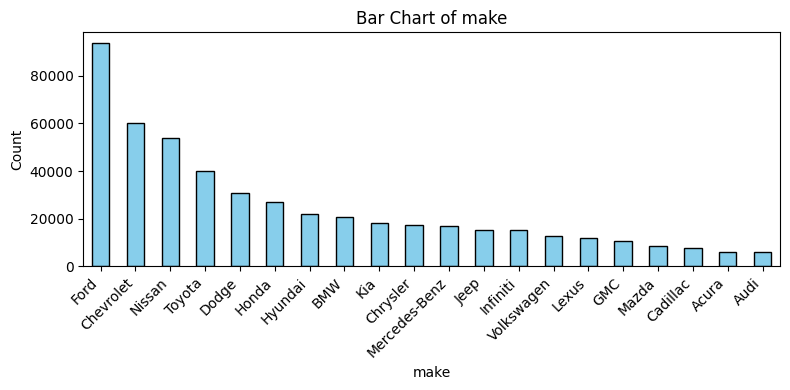

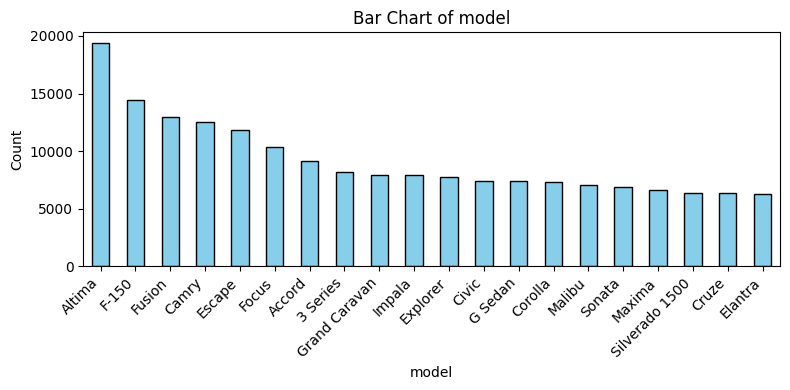

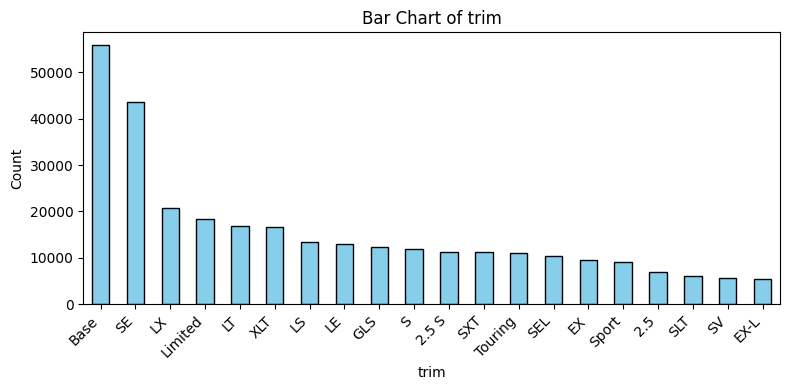

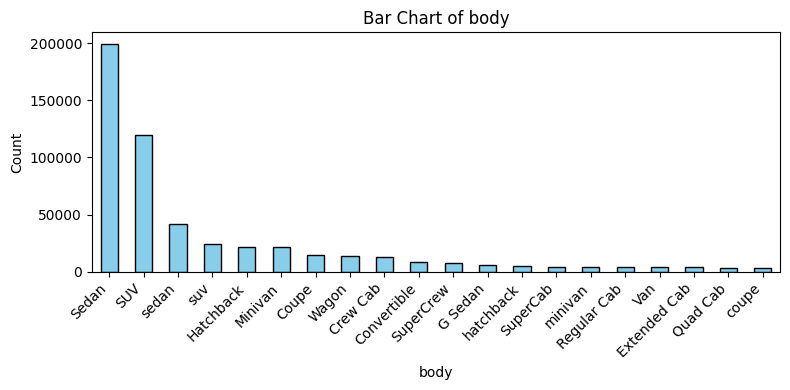

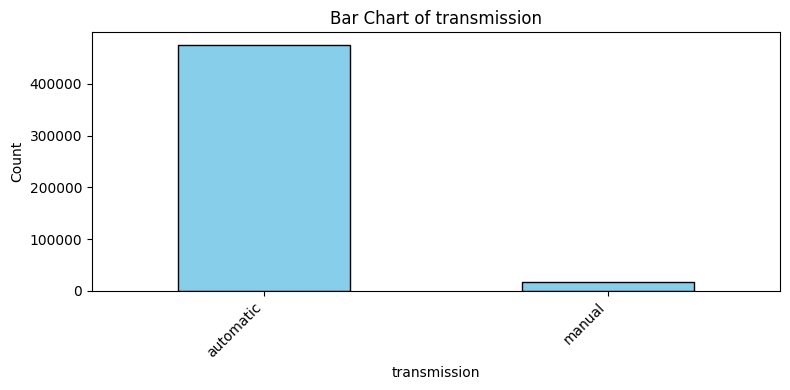

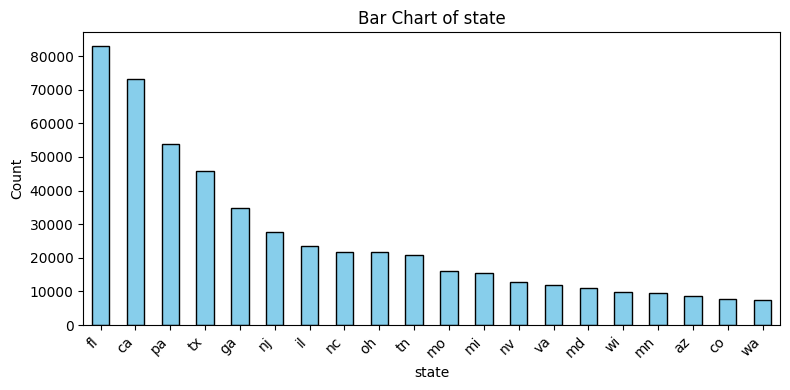

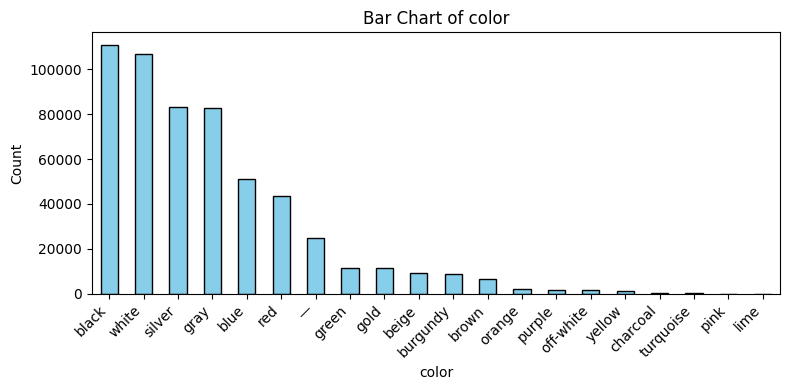

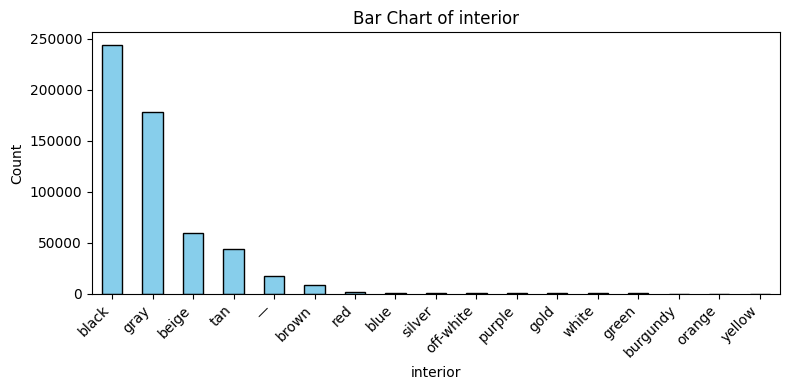

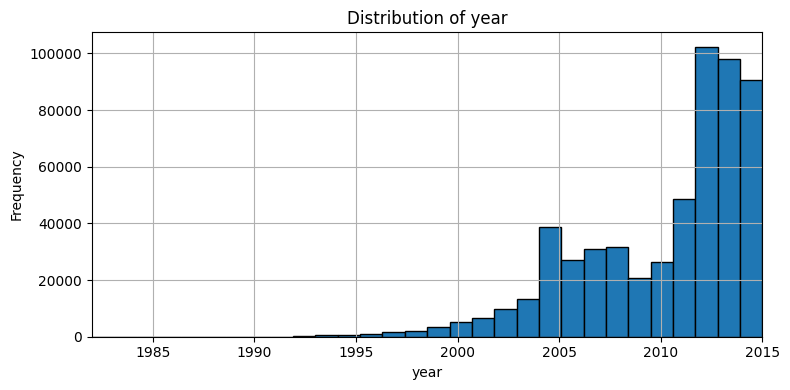

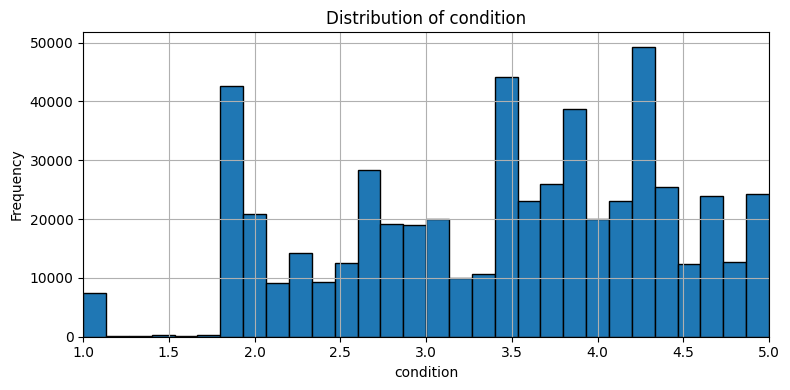

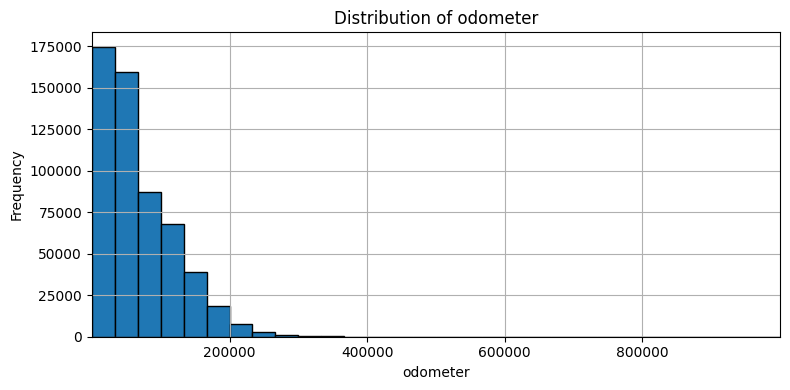

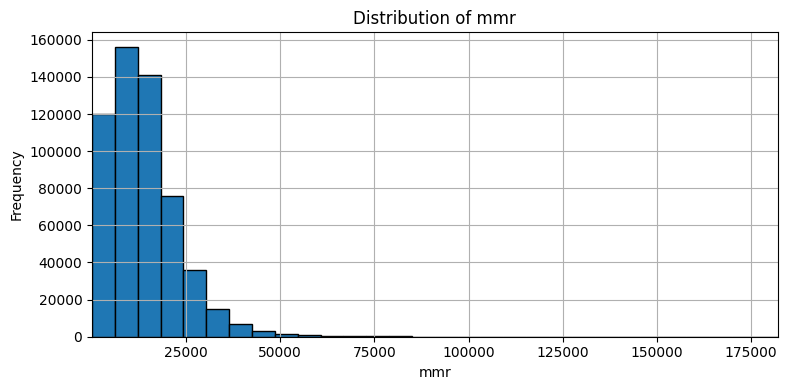

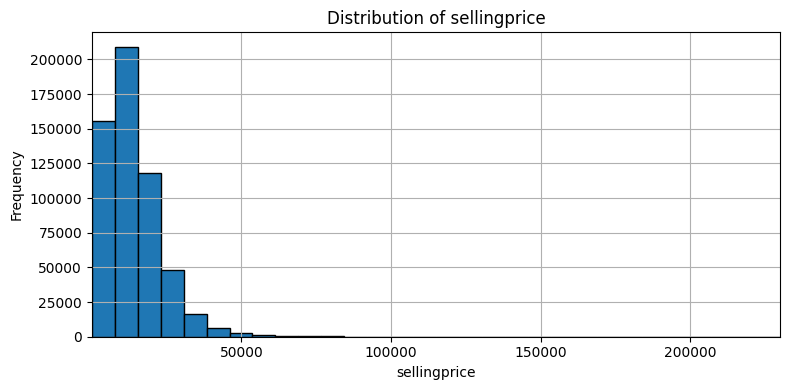

In [20]:
# List of columns for bar charts (categorical columns)
bar_chart_columns = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior']

# List of columns for histograms (numeric columns)
histogram_columns = ['year', 'condition', 'odometer', 'mmr', 'sellingprice']


# Create bar charts for each categorical column
for column in bar_chart_columns:
    plt.figure(figsize=(8, 4))
    df[column].value_counts().head(20).plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Create histograms for each numeric column
for column in histogram_columns:
    plt.figure(figsize=(8, 4))
    df[column].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xlim(left=df[column].min(), right=df[column].max())  # Set x-axis limits
    plt.tight_layout()
    plt.show()